# Example Usage Notebook

In this notebook we demonstrate the possibilites of our QUBO, how it can be solved either with with QAA or Simulated Annealing.

Example Timetables are outputed for different amounts of ships and time slots.

In [1]:
from pathlib import Path
import sys

subfolder_dir = (Path.cwd() / "code").resolve()
sys.path.insert(0, str(subfolder_dir))

from run import run_instance, print_results, iteration_run, plot
from QAA import run_simulation

## Simulated Annealing Solver
### Example Single Usage
Here we create a timetable for a number of instances and we run it on a simulated Annealer.

In this method the number of ships and time slots must be equal.

The optimal timetable is outputed as well with the water costs of each timetable

In [2]:
# Example Single Usage
# Change the number of ships or time slots a view the corresponding timeslot
number_ships = 3
number_time_slots = 3
NUM_READS = 25  # Number of of iterations of the simulated annealer

results = run_instance(number_ships, number_time_slots, NUM_READS)
print_results(number_ships, number_time_slots, results)

Instance with 3 ships (and 3 time slots):
  Optimized total water cost = 84.0
  Baseline total water cost   = 105
  Number of feasible solutions: 25
  Number of infeasible solutions: 0
  Tandem lockages used: 0
  Cross fills applied: 1
  Length of ships: [336.22 288.59 182.06]
  Benefit of ships: [6.5 6.5 5.7]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [3]
  Time slot 2 (Lock type: Panamax_B): Ships [2]
  Time slot 3 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------



### Mutiple Iterations and Comparison
Now we run the simulation form mutiple instances and compare baseline cost, simulated cost, and optimal cost.

In [3]:
# Size of List to Simulate
testing_sample = list(range(2, 6, 1))

# We set optimal to true to include it in calculations
instance_sizes, best_water_costs, baseline_costs, time, optimal_water = iteration_run(
    testing_sample, NUM_READS=25, optimal=True
)

Simualted Annealing Results
Sampling took 0.15 seconds.
Instance with 2 ships (and 2 time slots):
  Optimized total water cost = 75
  Baseline total water cost   = 75
  Number of feasible solutions: 25
  Number of infeasible solutions: 0
  Tandem lockages used: 0
  Cross fills applied: 0
  Length of ships: [335.96 178.47]
  Benefit of ships: [6.5 5.7]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [2]
  Time slot 2 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------

Optimal Results
  Timetable for best solution:
Water Cost 75.00.

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [2]
  Time slot 2 (Lock type: NeoPanamax): Ships [1]

--------------------------------------------------

Simualted Annealing Results
Sampling took 0.47 seconds.
Instance with 3 ships (and 3 time slots):
  Optimized total water cost = 84.0
  Baseline total water cost   = 105
  Number of feasible solutions

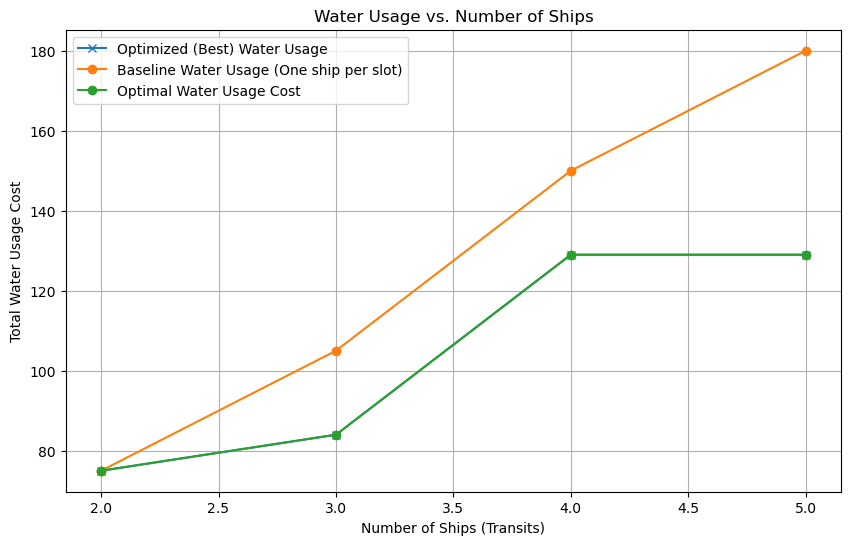

In [4]:
# Plot Reults of Experiment
plot(instance_sizes, best_water_costs, baseline_costs, optimal_water)

## QAA Implementation

Next we run the QUBO on a Pasqal Nuetral Atom Quantum Computer Simulator.

We produce the embedding for the number of ships and time slots.

Only up to 3 ships and 3 time slots are supported by the emulator.

In this instance the QUBO has been simplified such that local detuning does not need to be applied to individual qubits,

this results in the lowest energy system and therfore the most frequent solutions not being feasible. 

However, if we iterate over the solutions the first feasible solution becomes the solution found by our Simulated Annealer.

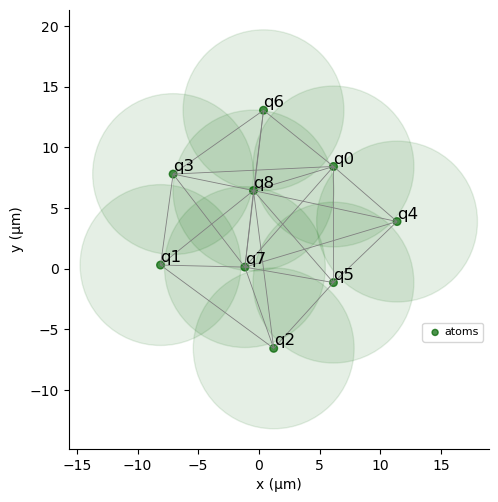

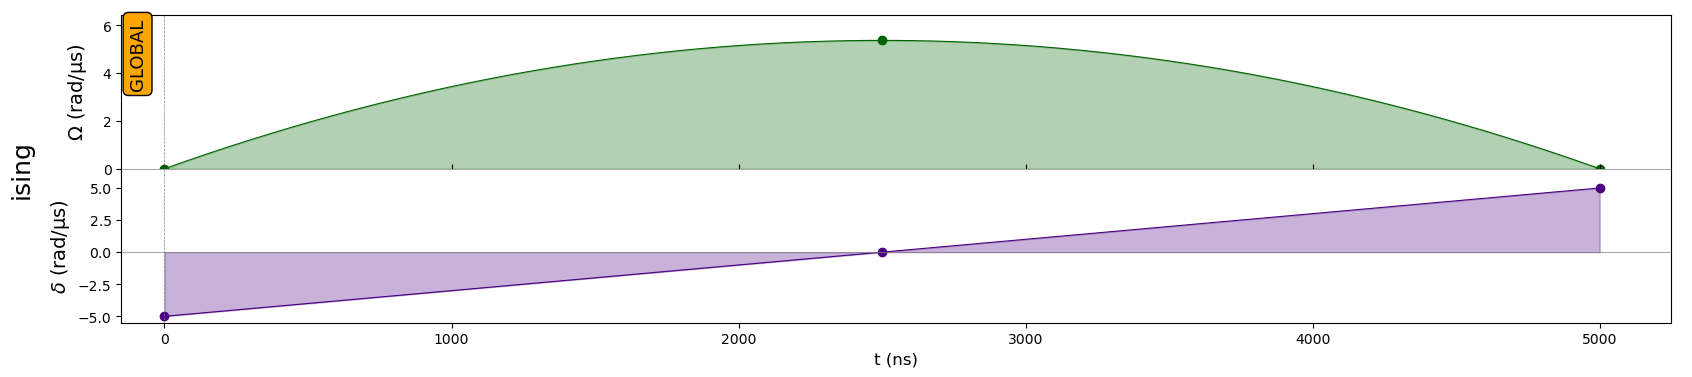

Running Simulation
Converting Bitstrings
Bitstring: 011010100
  Count: 378
  Assignment: {0: 0, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
  Evaluation: (224.0, 84.0, 260, 400, 1, 1, ['Ship 1 assigned 2 times (Expected 1).', 'Time slot 1 exceeds lock length by 350.73 meters'])
----------------------------------------
Bitstring: 001010100
  Count: 146
  Assignment: {0: 0, 1: 0, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
  Evaluation: (-111.0, 84.0, 195, 0, 0, 1, [])
----------------------------------------
Bitstring: 001110000
  Count: 99
  Assignment: {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0}
  Evaluation: (289.0, 84.0, 195, 400, 0, 1, ['Ship 2 assigned 2 times (Expected 1).', 'Ship 3 assigned 0 times (Expected 1).'])
----------------------------------------
Bitstring: 010010100
  Count: 50
  Assignment: {0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0}
  Evaluation: (44.0, 39.0, 195, 200, 1, 1, ['Time slot 1 exceeds lock length by 350.73 meters'])
---------------

In [5]:
number_ships = 3
number_time_slots = 3
assignment, evaluated_solutions, _ = run_simulation(number_ships, number_time_slots)

In [6]:
# Iterate over each Bitsring and its parameters
for bitsring, params in evaluated_solutions.items():
    # Check if the 7th parameter (index 6) is empty
    if not params[6]:
        print(f"Bitsring {bitsring} has parameters:")
        print("Water cost:", params[1])

Bitsring 001010100 has parameters:
Water cost: 84.0


This is the same results as our simulated annealing result verifying our methods